<a href="https://colab.research.google.com/github/hyper-mage/LandingAI/blob/main/FaceFocus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook runs off a model created in [LandingAI](https://app.landing.ai/)
Makes for a quick and easy way for developing and testing CV projects such as this small one that evaluates if a user is looking at the camera or not

In [2]:
!pip install landingai
from landingai.predict import Predictor
from landingai.image_source_ops import take_photo_from_webcam
from landingai.visualize import overlay_bboxes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.

In [3]:
# Enter your API Key
endpoint_id = "b5e07f7b-2b11-42b3-99fb-ebf4d63005f6"
from google.colab import userdata
api_key = userdata.get('landingai_api_key')

In [4]:
# Build predictor object for  your model
model = Predictor(endpoint_id, api_key=api_key)

<IPython.core.display.Javascript object>

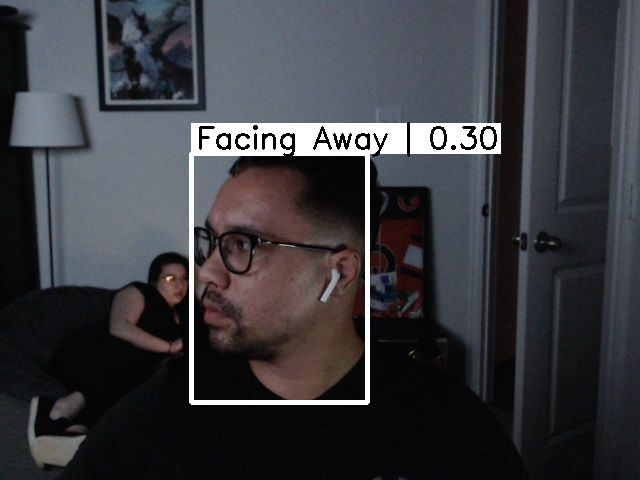

In [6]:
# Grab image from webcam
# face away
image = take_photo_from_webcam(1)
prediction = model.predict(image)
overlay_bboxes(prediction, image)

<IPython.core.display.Javascript object>

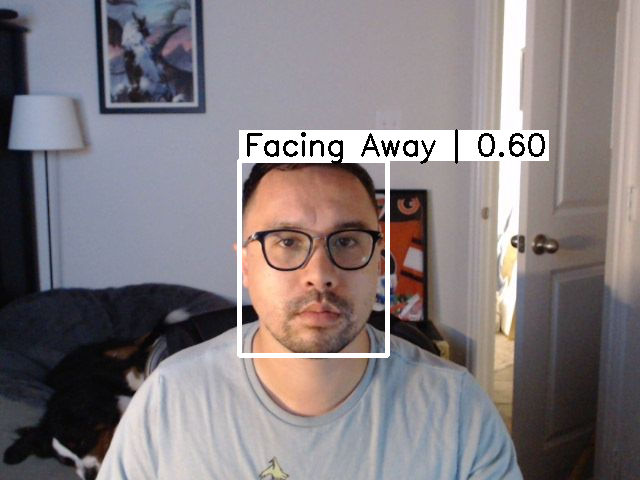

In [ ]:
# face camera
image = take_photo_from_webcam(1)
prediction = model.predict(image)
overlay_bboxes(prediction, image)

Nice it did a bad job. The model will need to be retrained with better data

Next part I want to play around with is live data

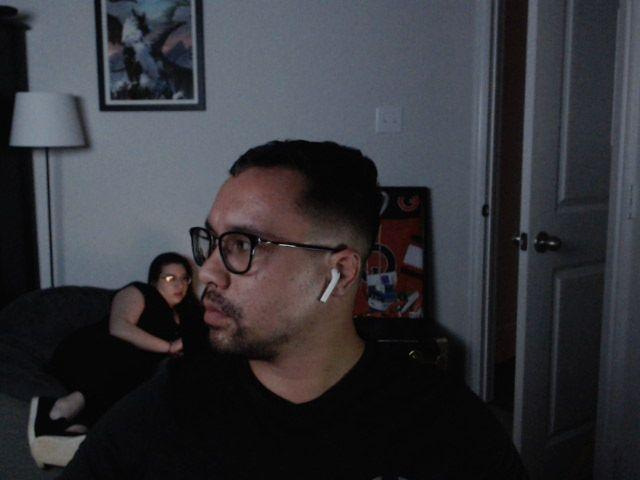

/usr/local/lib/python3.10/dist-packages/landingai/pipeline/frameset.py:706: UserWarning: image_src keyword on FrameSet.show_image is deprecated. Use include_predictions instead.
  warnings.warn(


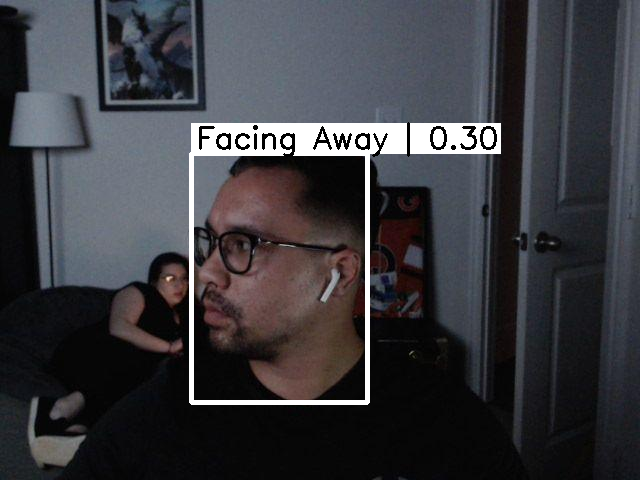

{
  "frames": [
    {
      "image": "<Image.Image: (640, 480)>",
      "other_images": {
        "overlay": "<Image.Image: (640, 480)>"
      },
      "predictions": [
        {
          "score": 0.30197247862815857,
          "label_name": "Facing Away",
          "label_index": 1,
          "id": "e1f0d2b2-b36a-4316-9cf8-cdb22f0109b5",
          "bboxes": [
            191,
            153,
            367,
            402
          ]
        }
      ],
      "metadata": {}
    }
  ]
}

In [11]:
from landingai.pipeline import FrameSet

# inference on one image
image.save('image.jpg')
frs = FrameSet.from_image('image.jpg')
frs.run_predict(predictor=model).overlay_predictions().show_image().show_image(image_src="overlay")

In [13]:
from landingai.data_management import Media

# list images
media_client = Media(61154212644876, api_key) # project id comes from the url in the project
media_client.ls(offset=0, limit=2)

{'medias': [{'id': 11900935,
   'mediaType': 'image',
   'srcType': 'user',
   'srcName': 'Matthew',
   'properties': {'width': 1920,
    'format': 'jpeg',
    'height': 1080,
    'orientation': 1},
   'name': '2023-12-20T21:55:13_610Z_WebcamCaptured.jpeg',
   'uploadTime': '2023-12-20T21:55:38.257Z',
   'mediaStatus': 'approved'},
  {'id': 11900934,
   'mediaType': 'image',
   'srcType': 'user',
   'srcName': 'Matthew',
   'properties': {'width': 1920,
    'format': 'jpeg',
    'height': 1080,
    'orientation': 1},
   'name': '2023-12-20T21:55:04_612Z_WebcamCaptured.jpeg',
   'uploadTime': '2023-12-20T21:55:38.184Z',
   'mediaStatus': 'approved'}],
 'num_requested': 2,
 'count': 2,
 'offset': 0,
 'limit': 2}

In [14]:
# async loops for notebooks, unneeded for python in the terminal

!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

# upload image
media_client.upload("image.jpg", split="dev")

{'num_uploaded': 1,
 'skipped_count': 0,
 'error_count': 0,
 'medias': [{'id': 11906569,
   'path': 's3://landinglens-customer-data-production/53340890066950/61154212644876/dataset/60050/media/2023-12-22T00-52-50-631Z-image.jpg',
   'name': 'image.jpg',
   'properties': {'width': 640, 'height': 480, 'imgType': 'jpg'},
   'uploadTime': '2023-12-22T00:52:51.509Z'}],
 'files_with_errors': {}}

Neat functions for uploading and managing data. Next part may be a different file entirely. Going to use streamlit to measure the time spent looking away vs at the camera as a small app